

## Use MNIST dataset to review classification models

Regression is a supervised learning task that allows the user to pick a value on a curve. However classification task in Machine Learning are supervised learning algorithms that attempt to predict the class of an object. For this assignment/chapter we will classify handwritten objects into their corresponding number class using the MNIST dataset (details below).  

https://en.wikipedia.org/wiki/MNIST_database
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The dataset can be accessed here: https://www.kaggle.com/datasets/hojjatk/mnist-dataset



In [15]:
#Setup


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [18]:
"""importing the mnist dataset directly from sklearn"""

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [19]:
"""Examining the shape of the dataset"""

X, y = mnist["data"], mnist["target"]
print(X.shape) #images
print(y.shape) #features
print(28 * 28) #size of pixel array



(70000, 784)
(70000,)
784


## Determinining the number of features

There are 70,000 images and each image has 784 pixels arranged in a 28*28 grid. 
Each pixel can hold a value between 0 (white) and 255 (black). 
View a sample image by using plt.imshow() [see below] 

Saving figure some_digit_plot


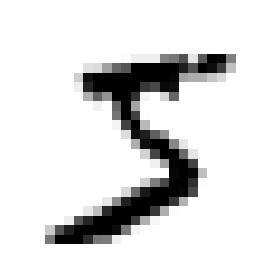

In [20]:
#view an image stored in the database


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [21]:
y[0] #confirm by looking what label is stored at that location

'5'

In [22]:
#coverting string from Y values into integers

y = y.astype(np.uint8)



### Visualizing the Mnist Dataset 

In [23]:


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")



In [24]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


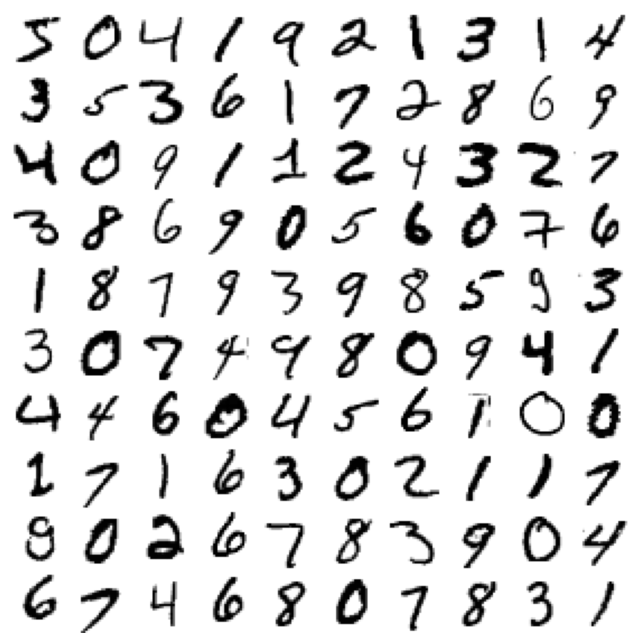

In [25]:


plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()



In [26]:
y[0]

5

# Training A binary Classifier 
Binary because it is either Yes or No that this is this the number five. See if it is possible to use the labels to identify just an single object instead of all ten digits.

In [28]:
#Training a binary classifier
"""create a test set even though MNIST already comes split up into a test set 6:1"""
"""store as x_train, x_test, y_train, y_test"""

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [30]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)


In [33]:
# now lets pick a classifier and train it. Starting with Stochastic Gradient Descent
# SGDClassifier() 

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #set random state the parameter for repeatability 

sgd_clf.fit(X_train, y_train_5) #training on only 5s in the Y col

SGDClassifier(random_state=42)

In [34]:
sgd_clf.predict([some_digit]) #remember some_digit = x[0] = "5" (see above)


array([ True])

### Array ([True])
The image at x[0] is indeed a 5 and the classifier was successful 



## Performance Measures
Time to evaluate your classifier, and you can evauluate your model using cross validation

In [38]:
"""Create K-fold cross-validation with 3 folds"""

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")



array([0.95035, 0.96035, 0.9604 ])

### Accuracy 

The ratio of correct predictions. These numbers will vary, but anything in the 90% is pretty good, considering that there is a 1 out of 10 chance at making the correct prediction (picking 5 out of 10 digits). 

In [39]:
#make an attempt with a dumb classifier that only looks at if something is or is not a "5"

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [40]:
#check the accuracy of your classifier, looking for 90% accuracy. 5 is one digit of ten. 

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Accuracy Measure 

Accuracy still in the 90%s 

In [41]:

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

# Confusion matrix 

This is a better way to evaluate the performance of a classifier. The confusion matrix looks at how often class A is mis-classified as class-B. For example, to know the number of times instances that the classifier confused 5s with 3s you would loke at the 5th row and the 3rd column of the confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[11] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.[12] The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another). 

In [67]:
#cross val predict performs a k fold cross validation and returns the predictions made on each fold 

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

"""Cross_val_predict is similar to cross_val_score in that it performs a k-fold cross validation 
but instead of evaluation scores it returns predictions scores made on each test fold"""

'Cross_val_predict is similar to cross_val_score in that it performs a k-fold cross validation \nbut instead of evaluation scores it returns predictions scores made on each test fold'

In [68]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred) #use the target classes and the predicted classes created above

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Deciphering confusion matrix

Each row in the confusion matrix represents a class. Each column represents a predicted class. 

53892 The 1st row considers none 5 images. [True Negatives] 

687 The 2nd col in the 1st row wrongly classified as 5s [False Positives]

1891 2nd row 1st col [False positives]

3530 2nd row 2nd col [True Positives]

#### Creating the perfect confusion Matrix

A perfect confusion matrix has zeroes in the diagnol, because there would only be true positives and true negatives. 

In [69]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision and Recall

To fully evaluate the effectiveness of a model, you must examine both precision and recall. Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa. 


Precision = (TP) / (TP + FP) 

Recall = (TP) / (TP + FN)
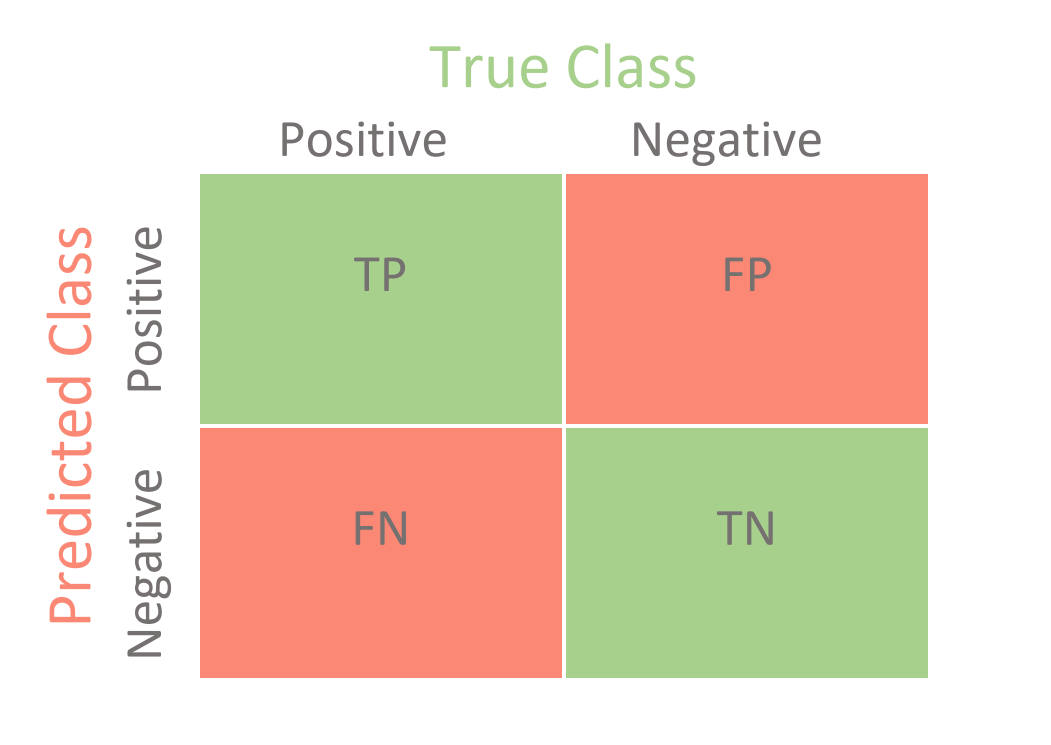

In [70]:
from sklearn.metrics import precision_score, recall_score 
precision_score(y_train_5, y_train_pred)

0.8370879772350012

### Precision = 83%

In [71]:


cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1]) #same formula from above



0.8370879772350012

In [72]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### recall = 65%

In [73]:
cm[1, 1] / (cm[1, 0] + cm[1, 1]) #same recall formula from above

0.6511713705958311

## Precision and Recall Analysis

The 5 detector only accurately makes a prediction with 83% precision.
Furthermore it only detects 65% of the 5s (recall). 

Increasing precision reduces recall and vice versa

## F-1 scores


In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. Precision is also known as positive predictive value, and recall is also known as sensitivity in diagnostic binary classification. 

In [74]:


from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)



0.7325171197343846

### F1 score

73%

In [75]:


cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)



0.7325171197343847

In [76]:
"""using the decision_function which provides a score for each instance in the fold
Decision function is a method present in classifier { SVC, Logistic Regression } 
class of sklearn machine learning framework. This method basically returns a Numpy array, 
In which each element represents whether a predicted sample for x_test by the classifier 
lies to the right or left side of the Hyperplane and also how far from the HyperPlane."""

y_scores = sgd_clf.decision_function([some_digit]) #decision_function
y_scores

array([2164.22030239])

In [77]:
"""Then use whatever threshold you want to make predicitons based on the scores"""

threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred



array([ True])

In [78]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [79]:
"""This confirms that raising the threshold decreases the recall. 
the classifier detects the digit when the theshold is zero but not 8000
use cross_val_predict() to get the scroes of all instances in the 
training set but this time specify that you want to return decision 
scrores insead of predictions"""

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [80]:


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)



Saving figure precision_recall_vs_threshold_plot


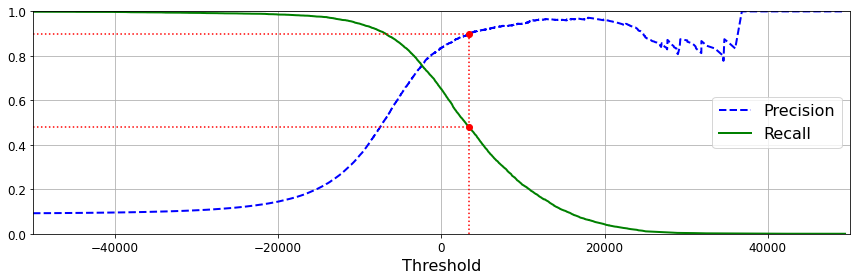

In [81]:
#use matplotlib to plot the recall and precision curves with both thresholds

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(12, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()



In [82]:


(y_train_pred == (y_scores > 0)).all()



True

Saving figure precision_vs_recall_plot


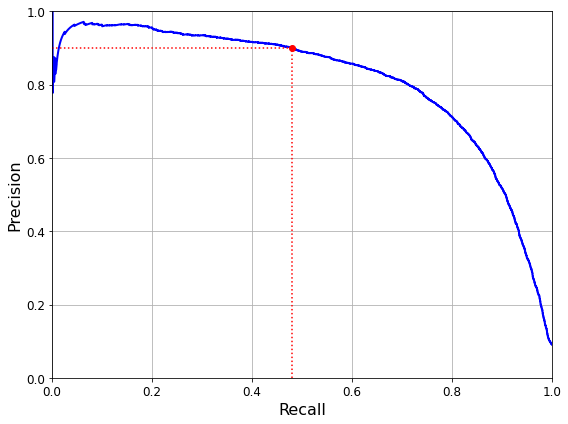

In [83]:


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()



In [84]:


threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]



In [85]:


threshold_90_precision



3370.0194991439557

In [86]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [87]:
#precision_score, recall_score

precision_score(y_train_5, y_train_pred_90)



0.9000345901072293

In [89]:
#precision_score, recall_score

recall_score(y_train_5, y_train_pred_90)



0.4799852425751706

In [90]:
# if someone ask for asks for 99% precision, ask them "at what recall?"


# ROC Curve
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). 

The ROC can also be thought of as a plot of the power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity or recall as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function (area under the probability distribution from − ∞ -\infty to the discrimination threshold) of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis. 



In [91]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


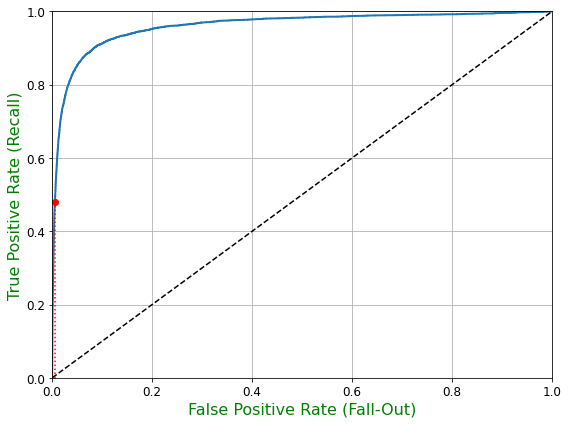

In [95]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', color='green', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', color='green',fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [96]:
"""Note that there is a trade off, where the higher the recall then the more 
false positives the classifier produces."""

'Note that there is a trade off, where the higher the recall then the more \nfalse positives the classifier produces.'

In [98]:


from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)



0.9604938554008616

### Training a random forrest Classifier

Use RandomForrestClassifier() and compare the ROC curves and AUC scores with the scores from the SGDClassifer 

In [99]:
from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [100]:


y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest) 

#roc curve is being passed class probabilities instead of labels and scores




Saving figure roc_curve_comparison_plot


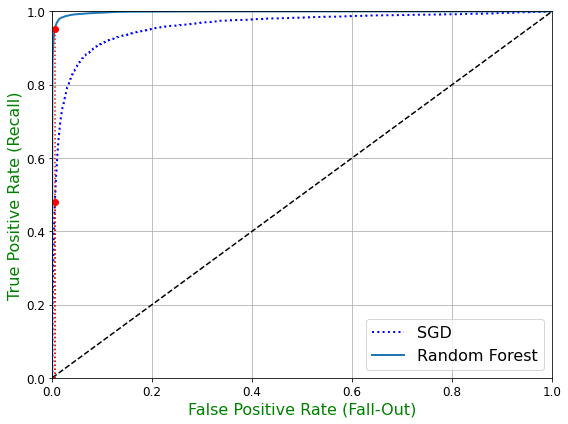

In [102]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [103]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

### Results of ROC analysis

The Random forest did a better job of classification than the SGD. Note how the RF line is much closer to the upper left.

# Multiclass Classification

In machine learning and statistical classification, multiclass classification or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

While many classification algorithms (notably multinomial logistic regression) naturally permit the use of more than two classes, some are by nature binary algorithms; these can, however, be turned into multinomial classifiers by a variety of strategies.

Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance. 

    Binary classification models like logistic regression and SVM do not support multi-class classification natively and require meta-strategies.
    
    The One-vs-Rest (OvR) strategy splits a multi-class classification into one binary classification problem per class.
    
    The One-vs-One (OvO) strategy splits a multi-class classification into one binary classification problem per each pair of classes.


In [105]:
#using the Support Vector Machine classifier

from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5 because we are training on every digit
svm_clf.predict([some_digit])



array([5], dtype=uint8)

In [106]:
#return scores for 10 digits

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores



array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [107]:
np.argmax(some_digit_scores)

5

In [108]:


svm_clf.classes_



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [110]:


svm_clf.classes_[5]



5

In [112]:
#use this code to create a multi class classifier using the OvRs strategy 

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])



array([5], dtype=uint8)

In [88]:


len(ovr_clf.estimators_)



10

In [113]:
#training a SGDClassifier


sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])



array([3], dtype=uint8)

In [114]:
#using the decision_function() method to evalute the score assigned to each class

sgd_clf.decision_function([some_digit])



array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [115]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

### Condifence in predictions

The large negative numbers above indicate that the model is with numbers are likely True Negatives (above). 

Use the Cross_Val_Score() method to evaluate the classifier's accuracy (below).

In [116]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")



array([0.8983, 0.891 , 0.9018])

# Error Analysis

Creating a confusion matrix

In [93]:


y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx



array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [94]:


# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)



Saving figure confusion_matrix_plot


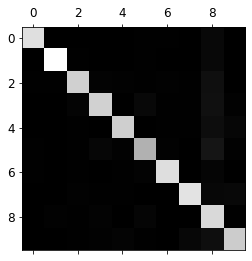

In [95]:


plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()



In [96]:


row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums



Saving figure confusion_matrix_errors_plot


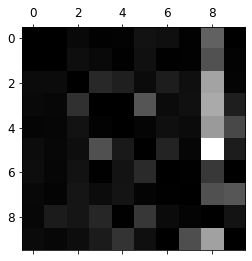

In [97]:


np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()



Saving figure error_analysis_digits_plot


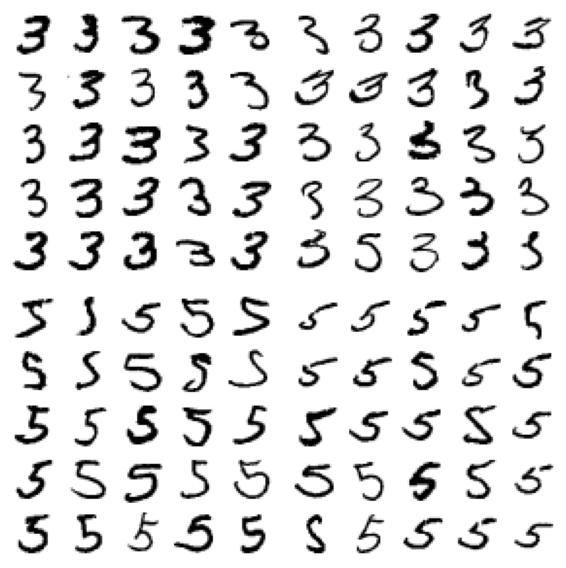

In [98]:


cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()



# Multilabel Classification

The differences between the types of classifications

    Binary classification:
    It is used when there are only two distinct classes and the data we want to classify belongs exclusively to one of those classes, e.g. to classify if a post about a given product as positive or negative;
    
    Multiclass classification: It is used when there are three or more classes and the data we want to classify belongs exclusively to one of those classes, e.g. to classify if a semaphore on an image is red, yellow or green;
    
    Multilabel classification:
    It is used when there are two or more classes and the data we want to classify may belong to none of the classes or all of them at the same time, e.g. to classify which traffic signs are contained on an image.

In [103]:


from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)



KNeighborsClassifier()

In [104]:


knn_clf.predict([some_digit])



array([[False,  True]])

In [105]:


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")



0.976410265560605

# Multioutput Classification

Multi-output classification is a type of machine learning that predicts multiple outputs simultaneously. In multi-output classification, the model will give two or more outputs after making any prediction. In other types of classifications, the model usually predicts only a single output.

An example of a multi-output classification model is a model that predicts the type and color of fruit simultaneously. The type of fruit can be, orange, mango and pineapple. The color can be, red, green, yellow, and orange. The multi-output classification solves this problem and gives two prediction results.

In [106]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


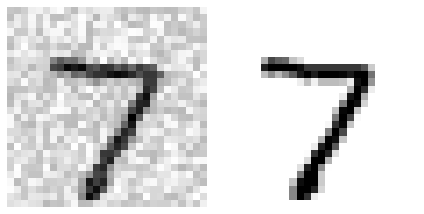

In [107]:


some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()



Saving figure cleaned_digit_example_plot


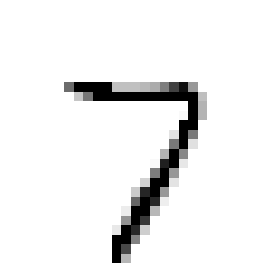

In [108]:


knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

